# Bike Sharing Assisgnment: Boom Bike Demand Analysis

Goal:
Required to model the demand for shared bikes of an US bike-sharing provider BoomBikes, with the available independent variables. It will be used to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels . Further, the model will be a good way to understand the demand dynamics of a new market. 




## Step 1: Reading and Understanding the data

In [776]:
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [777]:
#import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [778]:
# Importing Housing.csv
data=pd.read_csv("C:\\Users\\SOHINI\\Downloads\\day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [779]:
# Data Quality check
data.shape

(730, 16)

In [780]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Insights:**
- No missing values are present in the data. So good to go. No need to deal with missing values.
- Except one column dteday which is object type, all other are either float or integer type.
There are some fields that are categorical in nature, but are in integer/float type. Example : season, mnth, weathersit etc.
We will have to analyze and decide whether to convert them to categorical or treat as integer. 

In [781]:
# summary statistics of numerical variables
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data
Let's now dive into one of the the most important steps - understanding the data by visualizing it.

If there is some obvious multicollinearity going on, this is the first place to get hold of it.
Here's where we can also identify if some predictors directly have a strong association with the outcome variable

### Removing redundant columns 

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 72x144 with 0 Axes>

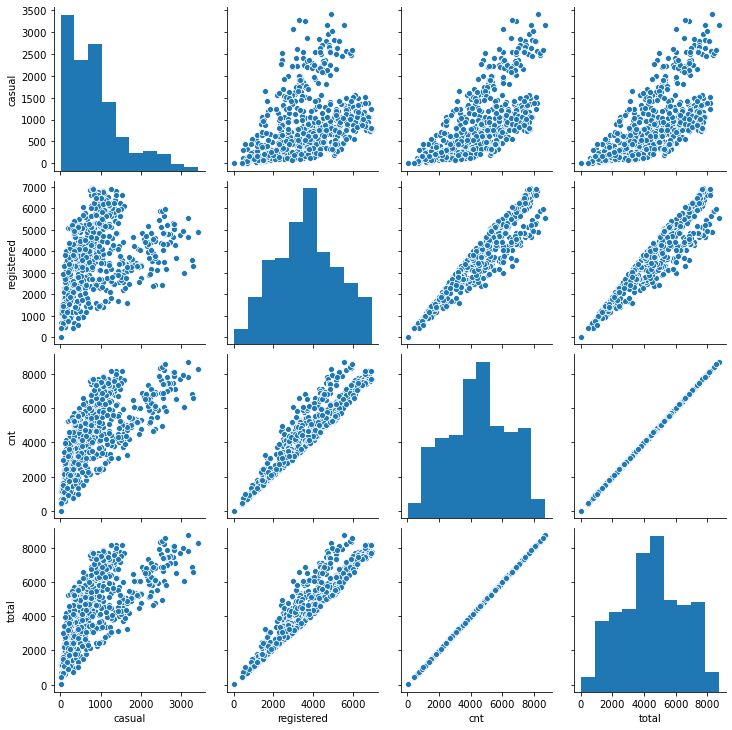

In [782]:
plt.figure(figsize=(1,2))
# Checking the relationship between casual, registered and cnt column
bike_cnt = data[['casual','registered','cnt']]

# Creating a column whch will show the value of casual + registered
bike_cnt['total'] = bike_cnt['casual'] + bike_cnt ['registered']
sns.pairplot(bike_cnt)
plt.show

**Insights:**
- Based on the analysis of the data and data dictionary given following variables can be removed. 
    - casual & registered: Both these columns contains the count of bike booked by different categories of customers. From the pairplot , we can concur that total bike rental value 'cnt = 'casual' + 'registered'. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.
    - dteday: This has the date, Since we already have separate columns for 'yr' & 'mnth' we can go ahead dropping this column.
    - instant: Thsi is the serial number of the data. So we can surely drop this column. 

In [783]:
# dropping `instant`,`dteday`,`casual`,`registered` 

data = data.drop(columns=['instant','dteday','casual','registered'])
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [784]:
data.shape

(730, 12)

### Visualizing continuous variable

After studying the dataset we can see that after dropping the 4 variables, there are 5 contniuous variables ('temp','atemp','hum','windspeed','cnt').Other variables are also in int type, but we need to convert them to category later. Let's visualize the contonuos variables! 

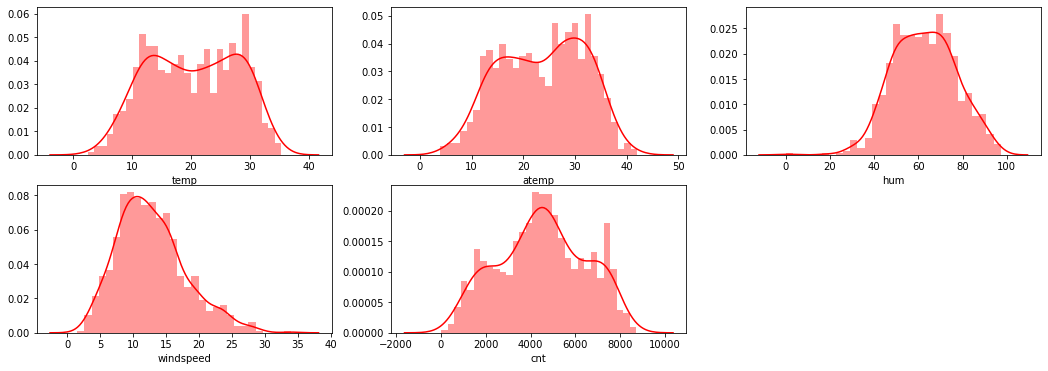

In [785]:
# Let's see how each of the continuos variable is distributed.

plt.figure(figsize=(18, 6))
plt.subplot(2,3,1)
sns.distplot(data['temp'], kde=True, color='red', bins=30)
plt.subplot(2,3,2)
sns.distplot(data['atemp'], kde=True, color='red', bins=30)
plt.subplot(2,3,3)
sns.distplot(data['hum'], kde=True, color='red', bins=30)
plt.subplot(2,3,4)
sns.distplot(data['windspeed'], kde=True, color='red', bins=30)
plt.subplot(2,3,5)
sns.distplot(data['cnt'], kde=True, color='red', bins=30)
plt.show()

**Insights:**
- Both "temp" and "atemp" has similar distribution curves having two peaks , one between 10 and 20 , and another around 30. 
- From "hum" distribution curve, it can be seen that most of the peaks are present between 40 and 80.
- Most of peaks of windspeed distribution lie between 9 and 10. 

<Figure size 360x432 with 0 Axes>

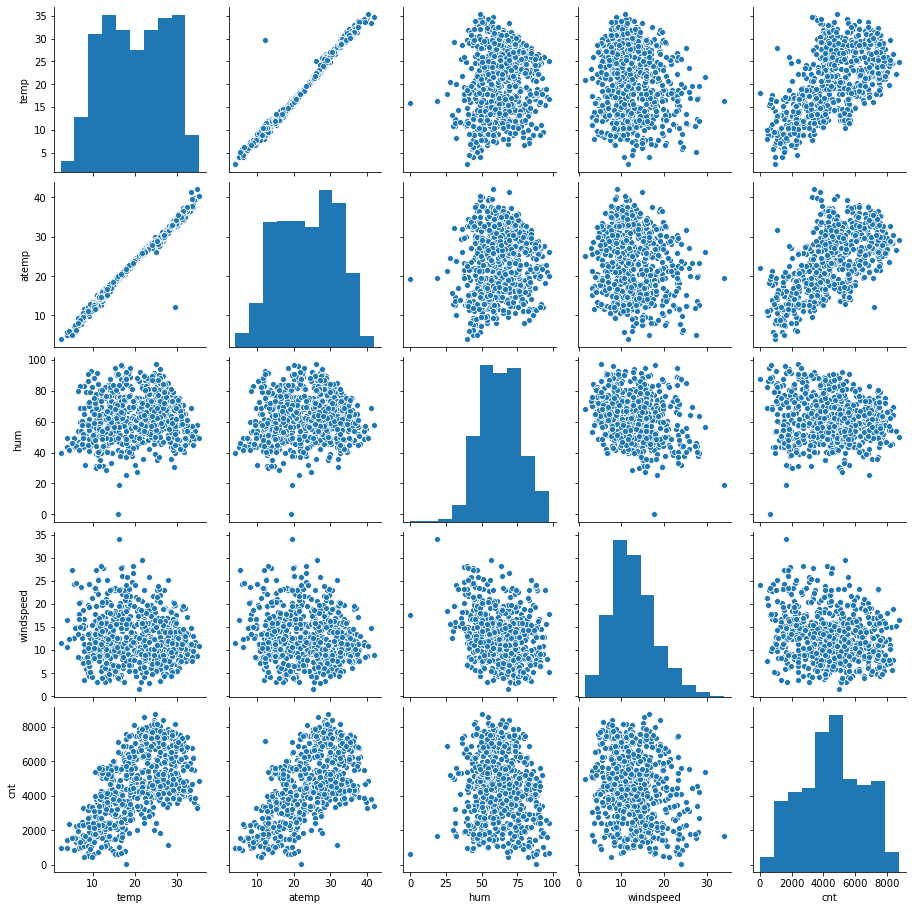

In [786]:
# pairplot of all the continuous variables 

plt.figure(figsize=(5,6))
bike_num = data[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

**Insights:**
- There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. 

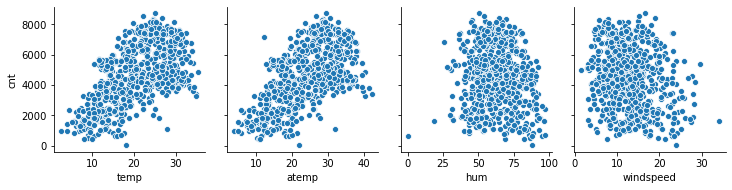

In [787]:
# Scatter Plots of Continuous variables vs target variable 'cnt' 

sns.pairplot(data=data,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter')
plt.show()

**Insights:**
- The number of rentals per day seem to be increasing with temperature and adjusted temperature
- adjusted temperature and temperature have similar trends


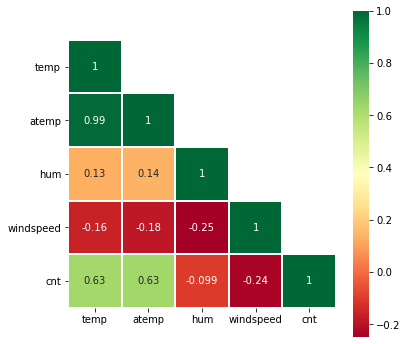

In [788]:
# Checking correlation of the parameters by mapping a correlation heatmap
mask=np.array(bike_num.corr())
mask[np.tril_indices_from(mask)]=False

plt.figure(figsize = (6,6))
sns.heatmap(bike_num.corr(), mask=mask, square=True, annot = True, cmap="RdYlGn",linewidth =1)

In [789]:
# correlation between temp and atemp
data[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


**Insights:** 
- From both the scatter plot and heatmap it can be seen that there is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables.
- windspeed has the lowest correlation.

### Visualizing categorical variables

After studying the dataset, we can see that there are total 7 categorical variables. 
- **yr, mnth, season, weekday, holiday, workingday, weathersit**
- Some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them. These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. So, these variables  should be converted to such feature values into categorical string values before proceeding with model building. 

In [790]:
# Converting variables into categorical type 

cat_vars= data[['season','weathersit','mnth','weekday','workingday','holiday','yr']]

data[['season','weathersit','mnth','weekday']] = data[['season','weathersit','mnth','weekday']].astype('category')

In [791]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### Encoding categorical variables

Given in data dictionary
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- mnth : month ( 1 to 12)
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- weekday : day of the week

In [792]:
# Replacing numerals with labels 

data.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
data.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
data.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


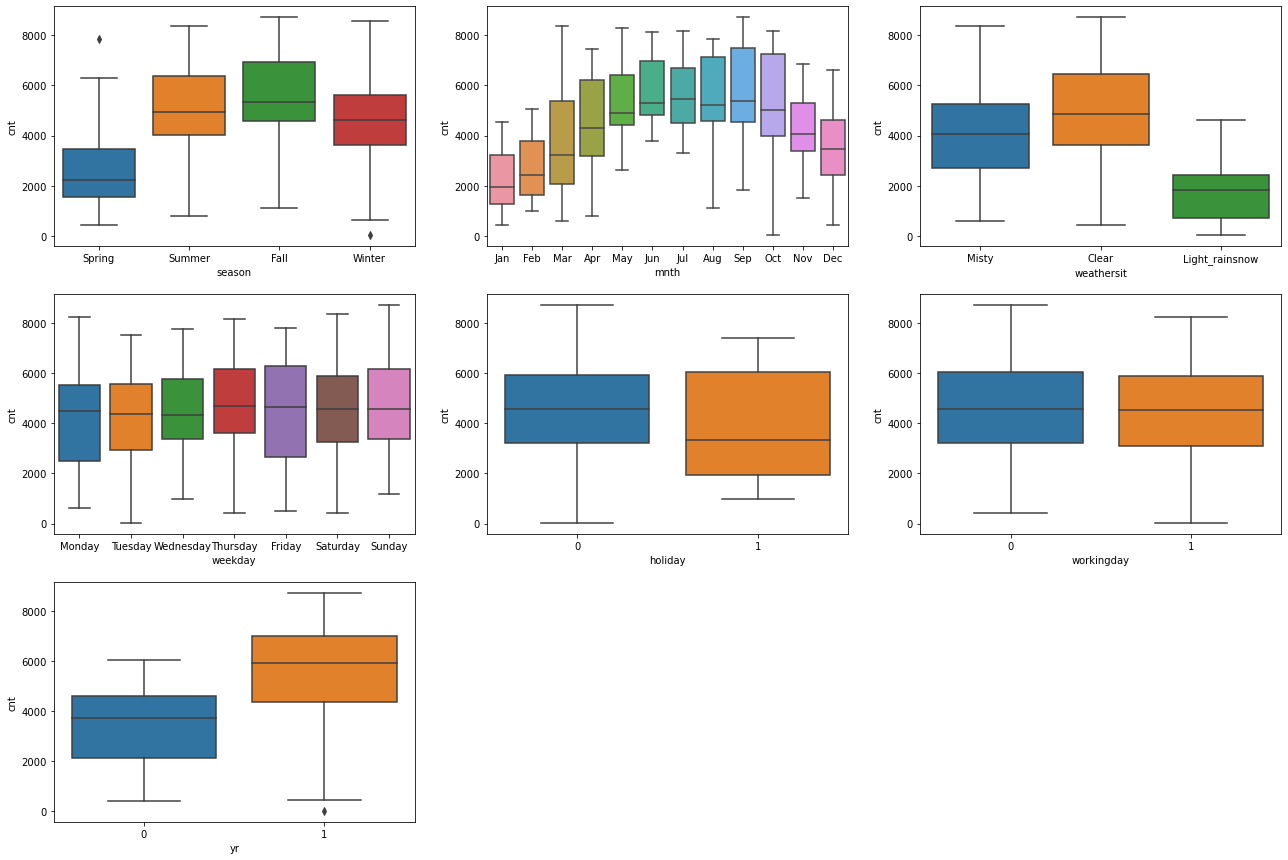

In [793]:
# to see how each of the categorical variable is related against the target variable.

plt.figure(figsize=(22, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.show()


**Insights:**
- From the season vs cnt plot , fall has the highest average rentals followed by summer, winter and lastly spring.
- From the month wise plot, September has the highest rentals, followed by the two months (October and August) surrounding it. It seems like the trend is explained by seasonal rentals too.
- From the weathersit vs cnt plot , clear weather has the highest average rentals followed by misty, and lastly light_rainbow.
- There is no significant difference between rentals cnt vs weekdays, except that Thursdays, mondays and fridays have a slightly higher variation in rentals than others.
- Holidays show lower rental count compared to working days, with greater variability in demand on holidays.

### Outliers in categorical variables handling

In [794]:
# Dropping outliers in Categorical Variables 

data = data.drop(index = data[(data['season'] == 'Spring') & (data['cnt'] > 7000)].index)

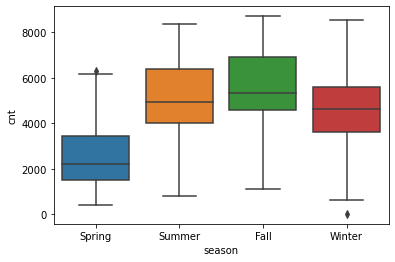

In [795]:
sns.boxplot(x = 'season', y = 'cnt', data = data)

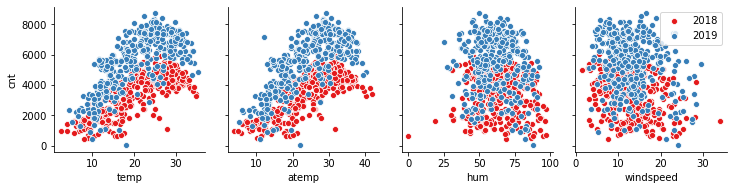

In [796]:
# Checking the impact of year against the numerical variable : 

ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=data, hue='yr', palette='Set1')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

**Insight:**

- All the parameters have greater values in 2019 compared to 2018. Thus, year may be considered as a key paratemeter in the model

## Step 3: Data Preperation 

- Creating Indictor Variables
- Splitting data set into Test & Train subsets
- Scaling Numerical Features


### Creating Indicator Variables

In [797]:
# Creating indicator variable columns
season_indicators = pd.get_dummies(data['season'],drop_first=True)
mnth_indicators = pd.get_dummies(data['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(data['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(data['weathersit'],drop_first=True)

In [798]:
# Merging indicator variable columns to the dataset. 
data = pd.concat([data,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)

#Dropping original columns
data = data.drop(columns=['season','mnth','weekday','weathersit'])

data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [799]:
# new shape of data

data.shape

(729, 30)

In [800]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Light_rainsnow',
       'Misty'],
      dtype='object')

In [801]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              729 non-null    int64  
 1   holiday         729 non-null    int64  
 2   workingday      729 non-null    int64  
 3   temp            729 non-null    float64
 4   atemp           729 non-null    float64
 5   hum             729 non-null    float64
 6   windspeed       729 non-null    float64
 7   cnt             729 non-null    int64  
 8   Spring          729 non-null    uint8  
 9   Summer          729 non-null    uint8  
 10  Winter          729 non-null    uint8  
 11  Aug             729 non-null    uint8  
 12  Dec             729 non-null    uint8  
 13  Feb             729 non-null    uint8  
 14  Jan             729 non-null    uint8  
 15  Jul             729 non-null    uint8  
 16  Jun             729 non-null    uint8  
 17  Mar             729 non-null    uin

**Insight:**
- All the 30 columns are now present as numeric value. The dataframe is ready now for splitting into Train & Test dataframes.

### Splitting the data into Train and Test datasets 

In [802]:
# We specify this so that the train and test data set always have the same no. of rows,respectively
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, random_state = 100)

In [803]:
# Checking the details of train and test dataset

print(data_train.shape)
print(data_test.shape)

(510, 30)
(219, 30)


### Rescaling numerical features

In [804]:
# Rescaling using MinMaxScaler
scaler = MinMaxScaler()

#Dataframe before scaling 
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty
626,1,0,1,22.652500,27.0202,53.6667,14.416725,7591,0,0,...,0,1,0,0,0,1,0,0,0,0
363,0,0,0,12.778347,15.9406,63.6667,9.000579,2999,1,0,...,0,0,0,0,1,0,0,0,0,0
425,1,0,0,14.486653,17.9921,65.7083,9.708568,3194,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1


In [805]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

#Checking after rescalling
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty
626,1,0,1,0.614763,0.605564,0.553027,0.371638,0.864421,0,0,...,0,1,0,0,0,1,0,0,0,0
363,0,0,0,0.314673,0.314694,0.656076,0.197852,0.310033,1,0,...,0,0,0,0,1,0,0,0,0,0
425,1,0,0,0.366591,0.368552,0.677114,0.220569,0.333575,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.164795,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.457443,0,1,...,0,0,0,0,1,0,0,0,0,1


In [806]:
data_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.539048,0.514650,0.648381,0.315400,0.493311
std,0.227284,0.213494,0.145999,0.170073,0.237651
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.336738,0.332086,0.538643,0.195527,0.326090
50%,0.545711,0.529718,0.649205,0.285417,0.496076
75%,0.739627,0.692378,0.755904,0.406426,0.685832
max,1.000000,1.000000,1.000000,1.000000,1.000000


### **After preparing the data, let's look at the heatmap and check the correlations between the variables.**

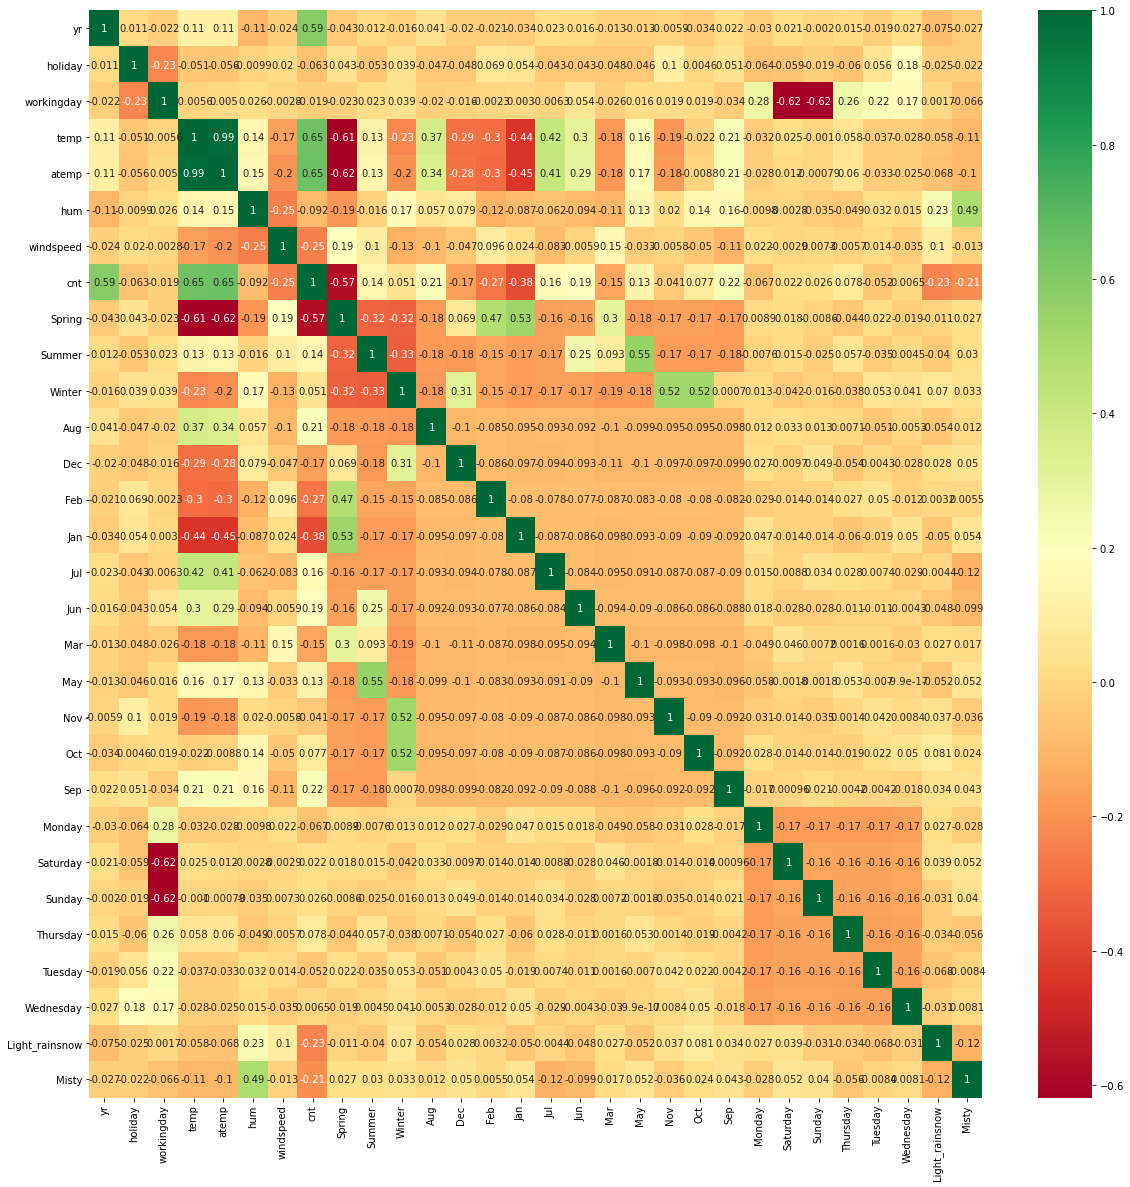

In [807]:
plt.figure(figsize = (20,20))
ax= sns.heatmap(data_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

**Insights:**
- There is multi-colinearity between the variables. We need to consider those factors when developing the model.
     - Such as temp and atemp has very high correlation value of 0.99. This suggest, we can use only one of these two variables.
- workingday variable has high negative correlation(-0.62) with Sat & Sun (where workingday =0).
- Spring is negatively correlated with cnt(-0.57).
- temp, atemp and yr has strong correlation with cnt(0.65,0.65,0.59 respectively).
- misty weather and humidity has correlation.
- various months and corresponding weathers are correlation.

- **As we might have noticed, temp, atemp and year seem to the correlated to rental counts the most, Let's see scatterplots for these three features vs cnt.**

<Figure size 432x432 with 0 Axes>

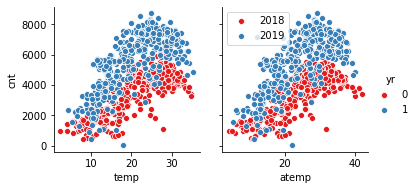

In [808]:
plt.figure(figsize=[6,6])
ax = sns.pairplot(x_vars=['temp', 'atemp'], y_vars=['cnt'] , data=data, hue='yr', palette="Set1")
plt.legend(labels=[2018,2019])
plt.show()

## Step 4: Building the Model

### Dividing into X_train and y_train


In [809]:
y_train = data_train.pop('cnt')
X_train = data_train

In [810]:
y_train.head()

626    0.864421
363    0.310033
425    0.333575
728    0.164795
482    0.457443
Name: cnt, dtype: float64

In [811]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty
626,1,0,1,0.614763,0.605564,0.553027,0.371638,0,0,0,...,0,1,0,0,0,1,0,0,0,0
363,0,0,0,0.314673,0.314694,0.656076,0.197852,1,0,0,...,0,0,0,0,1,0,0,0,0,0
425,1,0,0,0.366591,0.368552,0.677114,0.220569,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1


### Modelling

**Approach:**

- A mixed approach is followed(Automated and Manual).
- 15 Best columns are chosen using RFE
- And then p-value method is followed for further elimination.

### RFE 

In [812]:
# Importing required packages 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [813]:
# Running RFE with the output number of the variables: 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

# Checking which parameters have been selected in that list of 15
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))
rfe_ranking = pd.DataFrame({'rank' : rfe.ranking_, 'support': rfe.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
23,1,True,Sunday
22,1,True,Saturday
20,1,True,Sep
17,1,True,May
27,1,True,Light_rainsnow
9,1,True,Winter
14,1,True,Jul
28,1,True,Misty
6,1,True,windspeed


In [814]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Jul', 'May', 'Sep', 'Saturday', 'Sunday', 'Light_rainsnow',
       'Misty'],
      dtype='object')

In [815]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['holiday', 'Summer', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'Nov',
       'Oct', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [816]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,yr,workingday,temp,atemp,hum,windspeed,Spring,Winter,Jul,May,Sep,Saturday,Sunday,Light_rainsnow,Misty
626,1,1,0.614763,0.605564,0.553027,0.371638,0,0,0,0,1,0,0,0,0
363,0,0,0.314673,0.314694,0.656076,0.197852,1,0,0,0,0,0,1,0,0
425,1,0,0.366591,0.368552,0.677114,0.220569,1,0,0,0,0,1,0,0,1
728,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1,0,0.880586,0.845071,0.662087,0.372965,0,0,0,0,0,1,0,0,1
53,0,1,0.202618,0.218747,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,1,0.248216,0.223544,0.577930,0.431816,0,1,0,0,0,0,0,0,1
79,0,1,0.462664,0.434043,0.759870,0.529881,0,0,0,0,0,0,0,0,1


### Manual Model Development using Statsmodel 

In [817]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [818]:
# Function for checking significance of vriables

def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model

#### Model 1: Let's consider the features selected by RFE for further manual model building m

In [819]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,362.86
3,atemp,361.16
4,hum,30.80
1,workingday,20.08
5,windspeed,4.70
11,Saturday,4.59
12,Sunday,4.49
6,Spring,3.05
7,Winter,2.41
14,Misty,2.34


In [820]:
# Checking OLS Regression results

ols_fit(y_train,X_train_rfe)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     190.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.83e-194
Time:                        02:13:59   Log-Likelihood:                 497.46
No. Observations:                 510   AIC:                            -962.9
Df Residuals:                     494   BIC:                            -895.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2185      0.044      4.

**Insights:**
- From VIF calculation and OLS Reggression result we can see that atemp has highest p value(0.496) but atemp has VIF slightly less than temp (temp : 362.86 and atemp: 361.16). But according to rule we will go ahead dropping the variable first which has highest p value i.e. atemp. And also the information of atemp contained in temp. Therefore, will drop atemp and move ahead.  

#### Model 2: 

In [821]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,30.73
1,workingday,19.92
2,temp,17.84
10,Saturday,4.58
4,windspeed,4.56
11,Sunday,4.47
5,Spring,3.05
6,Winter,2.38
13,Misty,2.34
0,yr,2.08


In [822]:
# Checking OLS Regression results

ols_fit(y_train,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     203.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.18e-195
Time:                        02:14:00   Log-Likelihood:                 497.22
No. Observations:                 510   AIC:                            -964.4
Df Residuals:                     495   BIC:                            -900.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2196      0.044      5.

**Insights:**
- After having a look at the p values of all the variables from model 2, all the variables are statistically significant, no variable has p value greater than 0.05. Thus we will consider VIF values. "Hum" has the highest VIF value of 30.73. Therefore willd rop "Hum" and move ahead. 

#### Model 3:

In [823]:
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,workingday,15.16
2,temp,13.45
3,windspeed,4.49
9,Saturday,3.81
10,Sunday,3.66
4,Spring,2.69
0,yr,2.07
5,Winter,1.99
12,Misty,1.58
6,Jul,1.46


In [824]:
# Checking OLS Regression results

ols_fit(y_train,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          9.64e-191
Time:                        02:14:00   Log-Likelihood:                 484.04
No. Observations:                 510   AIC:                            -940.1
Df Residuals:                     496   BIC:                            -880.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1089      0.039      2.

**Insights:**
- p-values of all the variablesa are significant i.e. below 0.05, thus we will take VIF into account to move further. "workingday" has high VIF (15.16). Therefore will drop "workingday" from model 3.

#### Model 4:

In [825]:
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.22
2,windspeed,3.99
0,yr,2.06
3,Spring,1.70
11,Misty,1.54
5,Jul,1.45
4,Winter,1.43
6,May,1.28
7,Sep,1.26
8,Saturday,1.20


In [826]:
# Checking OLS Regression results
ols_fit(y_train,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.19e-190
Time:                        02:14:00   Log-Likelihood:                 479.50
No. Observations:                 510   AIC:                            -933.0
Df Residuals:                     497   BIC:                            -878.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1989      0.025      7.

**Insights:**
- After removing "workingday" it can be observed that VUF of "temp" reduced from 13.45 to 5.22.
- "Saturday" has high p=value(0.1)
- Thus will drop "Saturday" from model 4 and move ahead.


#### Model 5:

In [827]:
X_train_new = X_train_new.drop(['Saturday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.11
2,windspeed,3.99
0,yr,2.06
3,Spring,1.69
10,Misty,1.53
5,Jul,1.45
4,Winter,1.43
6,May,1.28
7,Sep,1.26
8,Sunday,1.15


In [828]:
# Checking OLS Regression results
ols_fit(y_train,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     238.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.24e-190
Time:                        02:14:00   Log-Likelihood:                 478.13
No. Observations:                 510   AIC:                            -932.3
Df Residuals:                     498   BIC:                            -881.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2007      0.025      8.

**Insights:**
- "Sunday" had high p-value (0.08>0.05).
- Therefore will drop "Sunday" and move ahead.

#### Model 6:

In [829]:
X_train_new = X_train_new.drop(['Sunday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,5.08
2,windspeed,3.98
0,yr,2.06
3,Spring,1.69
9,Misty,1.53
5,Jul,1.44
4,Winter,1.43
6,May,1.28
7,Sep,1.26
8,Light_rainsnow,1.07


In [830]:
# Checking OLS Regression results
ols_fit(y_train,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     261.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.27e-191
Time:                        02:14:01   Log-Likelihood:                 476.61
No. Observations:                 510   AIC:                            -931.2
Df Residuals:                     499   BIC:                            -884.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2046      0.025      8.

**Insights:**
- From the summary we can observe that p-values of all the variables are <0.05. So we can consider VIF values of all the variables.
- "temp" has VIF value 5.08>5. So we are supposed to drop "temp". But after dropping "temp" the R-squared value is getting down to 76.7%. 
- After doing trial and error, "May" has been dropped from model 6.

#### Model 7:

In [831]:
X_train_new = X_train_new.drop(['May'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,4.67
2,windspeed,3.97
0,yr,2.06
3,Spring,1.64
8,Misty,1.51
5,Jul,1.37
4,Winter,1.36
6,Sep,1.21
7,Light_rainsnow,1.07


In [832]:
# Checking OLS Regression results
ols_fit(y_train,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     287.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.05e-191
Time:                        02:14:01   Log-Likelihood:                 474.16
No. Observations:                 510   AIC:                            -928.3
Df Residuals:                     500   BIC:                            -886.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2131      0.025      8.

**Insights:**
- This model looks good, as there seems to be **VERY LOW Multicollinearity**  between the predictors (VIF values of all the variables are <5) and the p-values for all the predictors seems to be significant(<0.05). For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number)

### Verifying MultiCollinearity

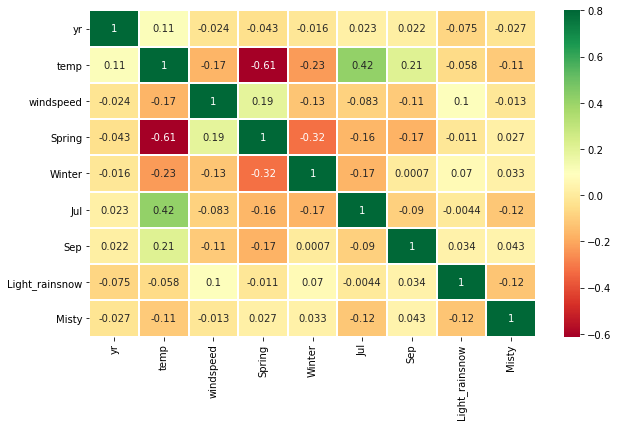

In [833]:
# Validating Multi Colinearity
plt.figure(figsize=(10,6))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1, vmax=0.8)
plt.show()

In [834]:
# to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
1,temp,4.67
2,windspeed,3.97
0,yr,2.06
3,Spring,1.64
8,Misty,1.51
5,Jul,1.37
4,Winter,1.36
6,Sep,1.21
7,Light_rainsnow,1.07


**Insights:**
- VIF < 5 for all features of X_train_new. No significant multicollinearity observed. Similar indicating comparison of R-squared and adjusted R-squared.

### Final Model


In [835]:
final_model = ols_fit(y_train,X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     287.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.05e-191
Time:                        02:14:02   Log-Likelihood:                 474.16
No. Observations:                 510   AIC:                            -928.3
Df Residuals:                     500   BIC:                            -886.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2131      0.025      8.

**Model Interpretations:**

- 9 features have been selected.
- All the features are statistically significant [low p-value]
- The model over is a good fit with Prob (F-statistic): 2.05e-191
- The model explains 83.8% variability in the training data. Adjusted R-square being 83.5m%

**The equation of best fitted surface based on model X_train_new:**

cnt = 0.2131 + 0.2444 yr + 0.4721 temp - 0.1255 windspeed - 0.1258 Spring + 0.0448 Winter - 0.0782 Jul + 0.0574 Sep - 0.2792 Light_rainsnow - 0.0911 Misty

## Step 4: Residual Analysis and Model Validation 

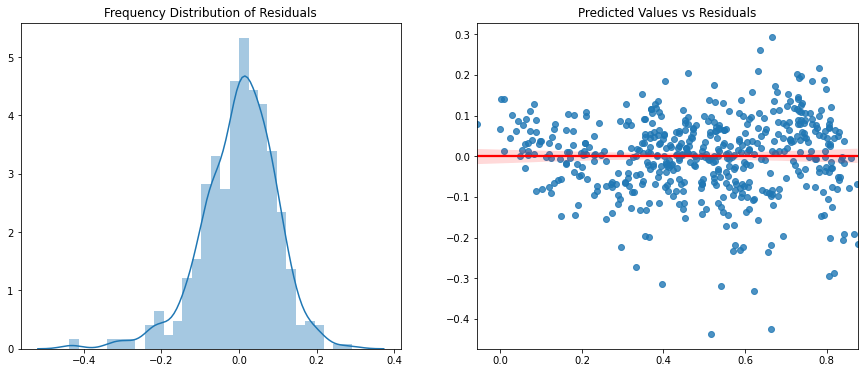

In [836]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train_new)

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(15)

ax[0].set(title='Frequency Distribution of Residuals')
res= y_train-y_train_pred
sns.distplot(res, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
sns.regplot(y_train_pred,res,ax=ax[1],line_kws={"color":"red"})
plt.show()

In [837]:
# Mean of Residuals
res.mean()

-1.1329172893932297e-15

**Insights:**
- **Normality of error** - Residual errors follow a normal distribution with mean=0
- Variance of Errors doesnt follow any trends
- Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.

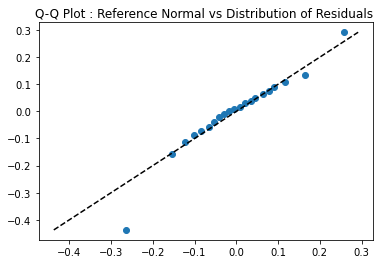

In [838]:
# Verifying the normality of distribution of residuals 
mean = res.mean()
std = res.std()

ref_normal = np.random.normal(mean,std,res.shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(res, percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
m = plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.savefig('q-q-plot.png')
plt.show()

**Insights:**
- This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data.

### To check linearity of the model 

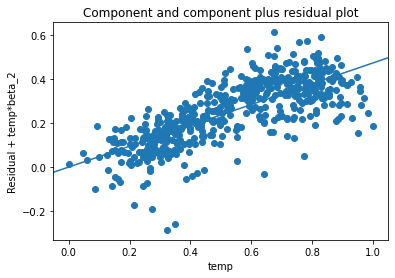

In [839]:
sm.graphics.plot_ccpr(final_model, 'temp')
plt.show()

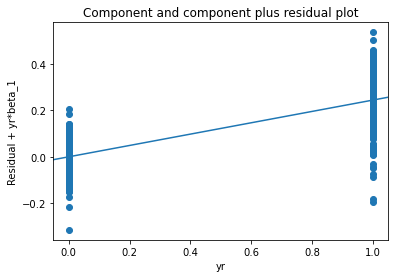

In [840]:
sm.graphics.plot_ccpr(final_model, 'yr')
plt.show()

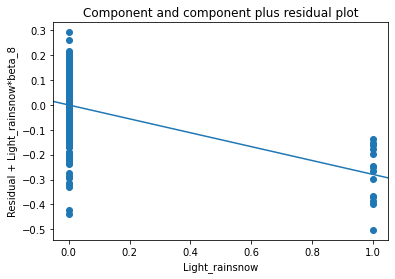

In [841]:
sm.graphics.plot_ccpr(final_model, 'Light_rainsnow')
plt.show()

**Insight:**
- The above plots represents the linear relationship between the model and the predictor variables. As we can see, linearity is well preserved

## Step 5: Predictions and Evaluation on the test set

### Scaling data_test dataframe
- Will apply scaler() to all numeric variables in test dataset. 
- We will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data.In other words, we want to prevent the information leak from train to test dataset.

In [842]:
# scaling data_test dataframe
num_vars = ['temp','atemp','hum','windspeed','cnt']

data_test[num_vars] = scaler.transform(data_test[num_vars])

data_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.677532,0,0,...,0,0,0,0,0,0,0,1,0,1
639,1,0,1,0.662528,0.608096,0.898240,0.133655,0.508028,0,0,...,1,0,0,0,0,0,0,1,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.268985,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.525051,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.547748,0,1,...,0,0,0,1,0,0,0,0,0,0


In [843]:
data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.045662,0.648402,0.554935,0.529249,0.642466,0.326821,0.487825,0.255708,0.269406,...,0.091324,0.073059,0.114155,0.159817,0.155251,0.146119,0.150685,0.164384,0.031963,0.319635
std,0.500513,0.209229,0.478563,0.230772,0.215679,0.148689,0.158694,0.223736,0.437258,0.444668,...,0.288730,0.260830,0.318728,0.367276,0.362974,0.354034,0.358561,0.371472,0.176306,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.298841,-0.042808,-0.049378,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353611,0.344751,0.531773,0.212553,0.338585,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.547268,0.538428,0.636324,0.311480,0.501630,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750790,0.709166,0.741240,0.415786,0.628335,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.815502,0.941205,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing X_test and y_test

In [844]:
# popping out cnt as y_test variable because it is the dependent variable
y_test = data_test.pop('cnt')
X_test = data_test

#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()


,const,yr,temp,windspeed,Spring,Winter,Jul,Sep,Light_rainsnow,Misty
184,1.0,0,0.831783,0.084219,0,0,1,0,0,1
639,1.0,1,0.662528,0.133655,0,1,0,0,1,0
299,1.0,0,0.511964,0.334206,0,1,0,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0,0


In [845]:
# checking info of the final variables
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           219 non-null    float64
 1   yr              219 non-null    int64  
 2   temp            219 non-null    float64
 3   windspeed       219 non-null    float64
 4   Spring          219 non-null    uint8  
 5   Winter          219 non-null    uint8  
 6   Jul             219 non-null    uint8  
 7   Sep             219 non-null    uint8  
 8   Light_rainsnow  219 non-null    uint8  
 9   Misty           219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.8 KB


### Making Predictions 

In [846]:
# Making predictions using the final_model 

y_test_pred = final_model.predict(X_test_sm)


### Model Evaluation 

Text(0, 0.5, 'y_test_pred')

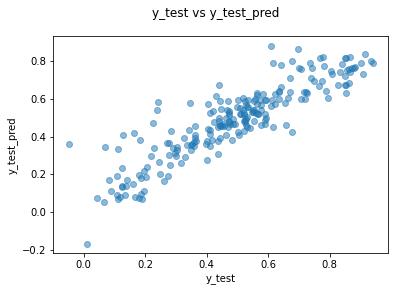

In [847]:
# plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred,alpha = 0.5)
fig.suptitle('y_test vs y_test_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_test_pred') 


In [848]:
# R2 Value Calculation for bike_test dataframe

r2_score = round(r2_score(y_test, y_test_pred),4)
r2_score

0.7896

In [849]:
# Adjusted R2 Value Calculation for bike_test dataframe
# R2adj=1− ((1-R2) x (n-1))/(n-p-1)
 
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2_score)*(n-1)/(n-p-1),4)
adjusted_r2

0.7805

In [850]:
from sklearn.metrics import mean_squared_error

In [851]:
# Claculating mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
mse

0.010482847127442515

In [852]:
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.84
R-squared for test data: 0.79
Mean Squared Error 0.01


## Final result comparison 
    
 Measurement     | Train Dataset  | Test Dataset |
-----------------|----------------|--------------|
   R2 Value      |     83.8%      |     78.96%   |
Adjusted R2 value|     83.5%      |     78.05%   |

                            It seems to be really a good model that can generalize various datasets.

In [853]:
col1

Index(['yr', 'temp', 'windspeed', 'Spring', 'Winter', 'Jul', 'Sep',
       'Light_rainsnow', 'Misty'],
      dtype='object')

## Top Features

In [854]:
# standardizing numerical variables 

from sklearn.preprocessing import StandardScaler
reg_features = col1
scaler = StandardScaler()
data = X_train_new
std_num = scaler.fit(data[['temp','windspeed']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed']]), columns=['temp','windspeed'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lm.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [0.2131219]


,MLR Coefficients
temp,0.472075
yr,0.244407
Sep,0.057450
Winter,0.044768
Jul,-0.078160
Misty,-0.091107
windspeed,-0.125484
Spring,-0.125844
Light_rainsnow,-0.279247


**Insights:**
- Upon standardizing the values of predictor variables, the above table shows that the top features influencing demand are **temp**, followed by **Light_rainsnow** and **yr**


In [855]:
final_model.params

const             0.213122
yr                0.244407
temp              0.472075
windspeed        -0.125484
Spring           -0.125844
Winter            0.044768
Jul              -0.078160
Sep               0.057450
Light_rainsnow   -0.279247
Misty            -0.091107
dtype: float64


## Conclusion


- Analysis is carried out using a Mixed Feature Selection Approach. 15 features are selected algorithmically using Recursive Feature Elimination (RFE). Further selection is done manually by looking at multicollinearity (VIF values) and statistical significance (P values) of features and overall fit of the model. 
- The 9 most significant features to understand demand have been reported.

- The data set is randomly divided into training and test data. Final Model built on training data set explains 84% of the variability and achieves 79% on test data.

#### Equation of Best fitted Model:
- The final relationship between demand and predictors is as follows .

  **cnt = 0.213122 + 0.244407 yr + 0.472075 temp - 0.125484 windspeed - 0.125844 Spring + 0.044768 Winter - 0.078160 Jul + 0.057450 Sep - 0.279247 Light_rainsnow  - 0.091107 Misty** 

  where temp and windspeed  are normalized.

- As per the final model, the top 3 predictor variables that influences bike booking are:

- **Temperature (Temp):**
  A coefficient value of ‘0.472075’ indicated that a temperature has significant impact on bike rentals

- **Light Rain & Snow (weathersit =3):**
  A coefficient value of ‘-0.279247’ indicated that the light snow and rain stops people from renting out bikes

- **Year (yr):**
  A coefficient value of ‘0.244407’ indicated that  year wise the rental numbers are increasing

- **It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.**


Note:
1. Data has been cleaned to drop outliers that might affect the model adversely
2. The model has been verified for Multicollinearity effects.
3. Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit homoscedasticity)
4. Q-Q plot between residual distribution and normal distribution shows that residuals follow a normal distribution for all interpolations. Extraplorations show significant deviation, not affecting Linear Regression applicability.
5. Features in the order of influence has been reported.

=====================================================================================================================